<a href="https://colab.research.google.com/github/salmankalamuddeen/Projects/blob/main/ml%20projects/fakenews%20detection/fakenews_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving Fake_Real_Data.csv to Fake_Real_Data (1).csv


In [ ]:
import pandas as pd
import numpy as np
import spacy
import io

In [ ]:
df=pd.read_csv('Fake_Real_Data.csv')
print(df.shape)
df.head(5)

(9900, 2)


,Text,label
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake
1,U.S. conservative leader optimistic of common ...,Real
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real
3,Court Forces Ohio To Allow Millions Of Illega...,Fake
4,Democrats say Trump agrees to work on immigrat...,Real


In [ ]:
df['label'].value_counts()

Fake    5000
Real    4900
Name: label, dtype: int64

In [ ]:
df['label_num']=df['label'].map({'Fake':0,'Real':1})
df.head(5)

,Text,label,label_num
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,0
1,U.S. conservative leader optimistic of common ...,Real,1
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,1
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,0
4,Democrats say Trump agrees to work on immigrat...,Real,1


In [ ]:
import spacy.cli
spacy.cli.download("en_core_web_lg")
nlp=spacy.load("en_core_web_lg")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [ ]:
df['vector']=df['Text'].apply(lambda text:nlp(text).vector)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(df.vector.values,df.label_num,test_size=0.2,random_state=2022)

In [ ]:
import numpy as np
X_train_2d = np.stack(X_train)
X_test_2d = np.stack(X_test)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()
scaled_train = scaler.fit_transform(X_train_2d)
scaled_test = scaler.transform(X_test_2d)


clf = MultinomialNB()
clf.fit(scaled_train, y_train)

MultinomialNB()

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
y_pred = clf.predict(scaled_test)
print(y_pred)

print(classification_report(y_test, y_pred))

[0 0 0 ... 0 0 0]
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      1024
           1       0.94      0.95      0.94       956

    accuracy                           0.94      1980
   macro avg       0.94      0.94      0.94      1980
weighted avg       0.94      0.94      0.94      1980



In [ ]:
from  sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')
clf.fit(X_train_2d, y_train)
y_pred = clf.predict(X_test_2d)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1024
           1       0.99      0.99      0.99       956

    accuracy                           0.99      1980
   macro avg       0.99      0.99      0.99      1980
weighted avg       0.99      0.99      0.99      1980



In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1011,   13],
       [   5,  951]])

Text(95.72222222222221, 0.5, 'Truth')

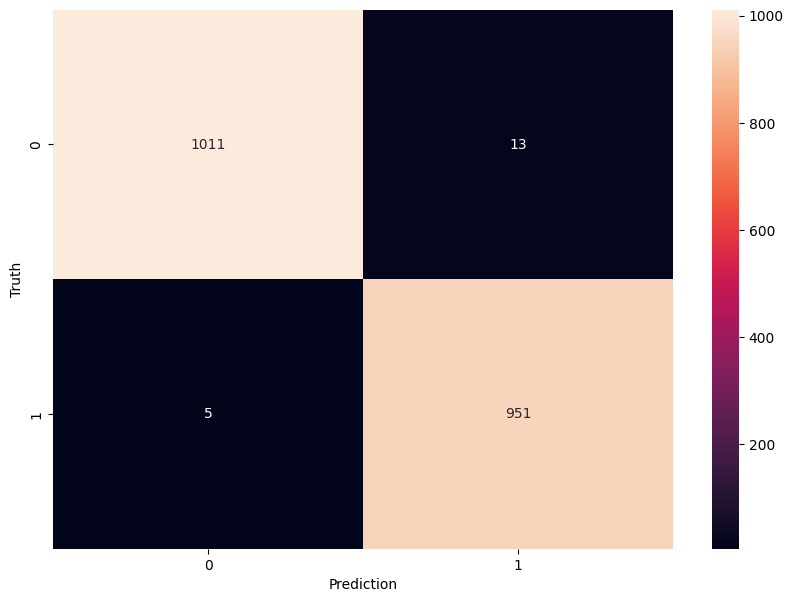

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')